# Indiana School Corporation Grades vs. Graducation Rates 

This notebook holds code for the final data analysis. I left in my exploration that did not make cut for the presentation, but I commented it out in the code. 

I started out wanting to visualize the school grade data. I created a multiline graph to see the  number of schools in each letter grade each year. I then made pie charts to visualize further, but the group decided the multiline graph was enough to show that data. I only saved the multiline graph to the output file. Insights gleened from this visualization of the letter grades is that there may have been a change in grading schools from 2015 to 2016. We speculated that was a result of a new state administration elected to lead the education department. If I had another two weeks, I would look into this further. Another insight is that D and F schools do not add up to many schools. That gave me some hope as we continued our analysis.  

Then I calulated the average percent change from the reported graduation rate to the non-waiver graduation rate. I wanted to isolate that number for analysis. That data is represented in bar graphs showing each letter grade's average change in grad rate with a graph for each year. I worked on a single grouped bar graph to visualize this data, but I couldn't get that working in time for the presentation. This data was less hopeful for Indiana schools. From 2015 to 2019 the use of graduation waivers went up significantly. That means more students are attending 4 years of high school in Indiana and leaving without meeting the graduation requirments. In a world that requires more and more understanding of S.T.E.M subjects and jobs for unskilled labor are dwindling, this is concerning. 

Finally, I used an anova analysis to compare average percent change in graduation rates per school letter grade. I expected there it be a statistical difference between how high performing schools and lower performing schools use graduation waivers. There was a satistical difference. I did this analysis on 2015. Out of all of the years obsurved in the data, 2015 data showed the least use of graduation waivers and the least difference between higher performing schools and lower performing schools in that use of waivers. If I did run an anova analysis on the other years we would see even more statistical difference beween the letter grades. For example, the outliers in 2015 showed up to 25% use of graduation waivers. In 2019, the average percent percent change in graudation to non-waiver graduation was over 50%. 

In conslusion, not all outliers are to be discarted from the data. In the case of schools, the outliers show us were our big problems are. If I was a state leader in eduation, I would be road tripping to talk to school administration, teachers, staff, and students in schools that is graduating more than half their students without them meeting state requriments for graduation. Was there an natural disaster that year? Did the drug addiction rate skyrocket in these locations? This analysis of the graduation waiver program left us with plenty of question for futher exploration.     

In [1]:
# Import dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in school grade files for each year
schoolgrade2015 = pd.read_csv('Resources/schoolgrade2015_revised.csv')
schoolgrade2016 = pd.read_csv('Resources/schoolgrade2016_revised.csv')
schoolgrade2017 = pd.read_csv('Resources/schoolgrade2017_revised.csv')
schoolgrade2018 = pd.read_csv('Resources/schoolgrade2018_revised.csv')
schoolgrade2019 = pd.read_csv('Resources/schoolgrade2019_revised.csv')
schoolgrade2015.head()

,Corp ID,Corporate Name,Corp Grade 2015
0,15,Adams Central Community Schools,C
1,5265,Alexandria Community School Corporation,C
2,5275,Anderson Community School Corporation,D
3,5470,Argos Community Schools,B
4,2435,Attica Consolidated School Corporation,D


## Visualize the portion of schools in each letter grade over time.  

In [4]:
# 2015 School corp letter grade data looks good.
gradecount2015 = schoolgrade2015['Corp Grade 2015'].value_counts()
gradecount2015

C    103
D     85
B     38
A     31
F     11
Name: Corp Grade 2015, dtype: int64

In [5]:
# 2016 School corp letter grade data looks good.
gradecount2016 = schoolgrade2016['Corp Grade 2016'].value_counts()
gradecount2016

B    166
C     75
A     21
D      5
F      1
Name: Corp Grade 2016, dtype: int64

In [6]:
# 2017: need to make "Appeal Pending" data null
schoolgrade2017['Corp Grade 2017'].value_counts()

# Marking "Appeal Pending" data null worked!!!
schoolgrade2017.loc[schoolgrade2017['Corp Grade 2017'] == 'Appeal Pending', :] = np.nan
gradecount2017 = schoolgrade2017['Corp Grade 2017'].value_counts()
gradecount2017

B    149
C     64
A     46
D      7
F      1
Name: Corp Grade 2017, dtype: int64

In [7]:
# 2018: need to make "Appeal Pending" data null
schoolgrade2018['Corp Grade 2018'].value_counts()

# Marking "Appeal Pending" data null worked!!!
schoolgrade2018.loc[schoolgrade2018['Corp Grade 2018'] == 'Appeal Pending', :] = np.nan
gradecount2018 = schoolgrade2018['Corp Grade 2018'].value_counts()
gradecount2018

B    143
C     62
A     44
D      3
F      1
Name: Corp Grade 2018, dtype: int64

In [8]:
# 2019: need to make "Appeal Pending" AND "No Grade" data null
schoolgrade2019['Corp Grade 2019'].value_counts()

# Marking "Appeal Pending" and "No Grade" data null worked!!!
schoolgrade2019.loc[schoolgrade2019['Corp Grade 2019'] == 'Appeal Pending', :] = np.nan
schoolgrade2019.loc[schoolgrade2019['Corp Grade 2019'] == 'No Grade', :] = np.nan

gradecount2019 = schoolgrade2019['Corp Grade 2019'].value_counts()
gradecount2019

B    149
C     62
A     45
D      2
F      2
Name: Corp Grade 2019, dtype: int64

In [9]:
multilinegraph = {'School Grade': ['A', 'B', 'C', 'D', 'F'],  
                  '2015': [31, 38, 103, 85, 11],
                  '2016': [21, 166, 75, 5, 1],
                  '2017': [46, 149, 64, 7, 1],
                  '2018': [44, 143, 62, 3, 1],
                  '2019': [45, 149, 62, 2, 2]
                 }
df = pd.DataFrame(data=multilinegraph)
df

,School Grade,2015,2016,2017,2018,2019
0,A,31,21,46,44,45
1,B,38,166,149,143,149
2,C,103,75,64,62,62
3,D,85,5,7,3,2
4,F,11,1,1,1,2


In [10]:
df_transposed = df.T
df_transposed

,0,1,2,3,4
School Grade,A,B,C,D,F
2015,31,38,103,85,11
2016,21,166,75,5,1
2017,46,149,64,7,1
2018,44,143,62,3,1
2019,45,149,62,2,2


In [11]:
df_transposed1 = df_transposed.rename(columns={0: "A", 1: "B", 2: "C", 3: "D", 4: "F"})
df_transposed2 = df_transposed1.drop(['School Grade'])
df_transposed2

,A,B,C,D,F
2015,31,38,103,85,11
2016,21,166,75,5,1
2017,46,149,64,7,1
2018,44,143,62,3,1
2019,45,149,62,2,2


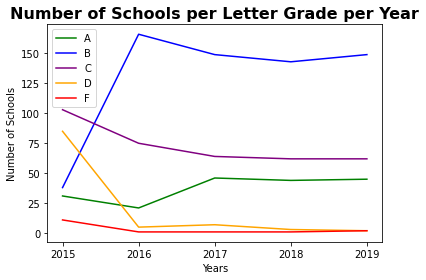

In [12]:
# Show school grade over years in Multi line graph
#grades = ['A', 'B', 'C', 'D', 'F']
years = ['2015', '2016', '2017', '2018', '2019']

# Plot school corp grade count for each year
plt.plot(years, df_transposed2['A'], color="green", label="A" )

plt.plot(years, df_transposed2['B'], color="blue", label="B" )

plt.plot(years, df_transposed2['C'], color="purple", label="C" )

plt.plot(years, df_transposed2['D'], color="orange", label="D" )

plt.plot(years, df_transposed2['F'], color="red", label="F" )

# Create a legend for our chart
plt.legend()

plt.title("Number of Schools per Letter Grade per Year", fontsize=16, fontweight='bold')
plt.xlabel("Years")
plt.ylabel("Number of Schools")

plt.savefig("Output_Data/schoolgradecount.png") 
# Show the chart
plt.show()

In [13]:
# Pie Chart of School Corp Grade Percentages 2015

# = ["yellowgreen", "red", "lightcoral", "lightskyblue", "gold"]
#explode = (0, 0.05, 0, 0)
#labels = ['A', 'B', 'C', 'D', 'F']


#plt.title("School Corp Grade Percentatges 2015")
#plt.pie(gradecount2015, labels=labels, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=90)
#plt.axis("equal")
#plt.show()

In [14]:
# Pie Chart of School Corp Grade Percentages 2016
#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "gold"]
#explode = (0, 0.05, 0, 0)
#labels = ['A', 'B', 'C', 'D', 'F']

#plt.title("School Corp Grade Percentatges 2016")
#plt.pie(gradecount2016, labels=labels, colors=colors,
 #       autopct="%1.1f%%", shadow=True, startangle=90)
#plt.axis("equal")
#plt.show()

In [15]:
# Pie Chart of School Corp Grade Percentages 2017
#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "gold"]
#explode = (0, 0.05, 0, 0)
#labels = ['A', 'B', 'C', 'D', 'F']

#plt.title("School Corp Grade Percentatges 2017")
#plt.pie(gradecount2017, labels=labels, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=90)
#plt.axis("equal")
#plt.show()

In [16]:
# Pie Chart of School Corp Grade Percentages 2018
#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "gold"]
#explode = (0, 0.05, 0, 0)
# labels = ['A', 'B', 'C', 'D', 'F']

# plt.title("School Corp Grade Percentatges 2018")
# plt.pie(gradecount2018, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=90)
# plt.axis("equal")
# plt.show()

In [17]:
# # Pie Chart of School Corp Grade Percentages 2019
# colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "gold"]
# explode = (0, 0.05, 0, 0)
# labels = ['A', 'B', 'C', 'D', 'F']

# plt.title("School Corp Grade Percentatges 2019")
# plt.pie(gradecount2019, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=90)
# plt.axis("equal")
# plt.show()

In [18]:
#gradecount1 = pd.merge(schoolgrade2015, schoolgrade2016, on="Corporate Name")
#gradecount1.head()

In [19]:
#gradecount2 = gradecount1.drop(['Corp ID_y'], axis=1)
#gradecount2.head()

In [20]:
#gradecount3 = pd.merge(gradecount2, schoolgrade2017, on="Corporate Name")
#gradecount3.head()

In [21]:
#gradecount4 = gradecount3.drop(['Corp ID'], axis=1)
#gradecount4.head()

In [22]:
#gradecount5 = pd.merge(gradecount4, schoolgrade2018, on="Corporate Name")
#gradecount5.head()

In [23]:
#gradecount6 = gradecount5.drop(['Corp ID'], axis=1)
#gradecount6.head()

In [24]:
#gradecount7 = pd.merge(gradecount6, schoolgrade2019, on="Corporate Name")
#gradecount7.head()

In [25]:
#gradecount8 = gradecount7.drop(['Corp ID'], axis=1)
#gradecount8.head()

In [26]:
#gradecount9 = gradecount8.drop(['Corp ID_x'], axis=1)
#gradecount9.head()

## Visualize the change in rate compared to letter grade 

In [27]:
# Read in school grade files for each year
gradrate2015 = pd.read_csv('Resources/2015_grad_rates_revised.csv')
gradrate2016 = pd.read_csv('Resources/2016_grad_rates_revised.csv')
gradrate2017 = pd.read_csv('Resources/2017_grad_rates_revised.csv')
gradrate2018 = pd.read_csv('Resources/2018_grad_rates_revised.csv')
gradrate2019 = pd.read_csv('Resources/2019_grad_rates_revised.csv')
gradrate2015.head()

,Corp Id,CORPORATION NAME,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate
0,15,Adams Central Community Schools,95,90,94.70%,87,91.60%
1,5265,Alexandria Community School Corporation,112,98,87.50%,97,86.60%
2,5275,Anderson Community School Corporation,394,353,89.60%,277,70.30%
3,5470,Argos Community Schools,46,34,73.90%,34,73.90%
4,2435,Attica Consolidated School Corporation,68,67,98.50%,64,94.10%


In [28]:
# Merge School Grade with School Grad info:
schoolgrade15 = schoolgrade2015.rename(columns={"Corporate Name":"CORPORATION NAME"})
#schoolgrade15.head()

grade_grad15 = pd.merge(schoolgrade15, gradrate2015, on="CORPORATION NAME")
#grade_grad15.head()

# find change in grad rate =  grad n - non-waiver n / grad n
grade_grad15['Percent Change in Grad Rate'] = (grade_grad15['Grad N'] - grade_grad15['Non-Waiver Grad N']) / grade_grad15['Grad N'] * 100
grade_grad15.head()

,Corp ID,CORPORATION NAME,Corp Grade 2015,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15,Adams Central Community Schools,C,15,95,90,94.70%,87,91.60%,3.333333
1,5265,Alexandria Community School Corporation,C,5265,112,98,87.50%,97,86.60%,1.020408
2,5275,Anderson Community School Corporation,D,5275,394,353,89.60%,277,70.30%,21.529745
3,5470,Argos Community Schools,B,5470,46,34,73.90%,34,73.90%,0.000000
4,2435,Attica Consolidated School Corporation,D,2435,68,67,98.50%,64,94.10%,4.477612


In [29]:
# Assign integers to letter grades
mapping = {'A': 1 , 'B': 2, 'C': 3, 'D': 4, 'F': 5}
mapped2015 = grade_grad15.replace({'Corp Grade 2015': mapping})
mapped2015.head()

,Corp ID,CORPORATION NAME,Corp Grade 2015,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15,Adams Central Community Schools,3,15,95,90,94.70%,87,91.60%,3.333333
1,5265,Alexandria Community School Corporation,3,5265,112,98,87.50%,97,86.60%,1.020408
2,5275,Anderson Community School Corporation,4,5275,394,353,89.60%,277,70.30%,21.529745
3,5470,Argos Community Schools,2,5470,46,34,73.90%,34,73.90%,0.000000
4,2435,Attica Consolidated School Corporation,4,2435,68,67,98.50%,64,94.10%,4.477612


In [30]:
mapped2015.dtypes

Corp ID                          int64
CORPORATION NAME                object
Corp Grade 2015                  int64
Corp Id                          int64
Cohort N                         int64
Grad N                           int64
State Grad Rate                 object
Non-Waiver Grad N                int64
State Non-Waiver Grad Rate      object
Percent Change in Grad Rate    float64
dtype: object

In [31]:
mapped2015['Corp Grade 2015'].astype(float)

0      3.0
1      3.0
2      4.0
3      2.0
4      4.0
      ... 
263    1.0
264    3.0
265    4.0
266    2.0
267    1.0
Name: Corp Grade 2015, Length: 268, dtype: float64

In [32]:
# Merge School Grade with School Grad info:
schoolgrade16 = schoolgrade2016.rename(columns={"Corporate Name":"CORPORATION NAME"})
#schoolgrade16.head()
grade_grad16 = pd.merge(schoolgrade16, gradrate2016, on="CORPORATION NAME")
#grade_grad15.head()

# grad n - non-waiver n / grad n
grade_grad16['Percent Change in Grad Rate'] = (grade_grad16['Grad N'] - grade_grad16['Non-Waiver Grad N']) / grade_grad16['Grad N'] * 100
grade_grad16.head()

,Corp ID,CORPORATION NAME,Corp Grade 2016,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15,Adams Central Community Schools,B,15,87,86,98.90%,85,97.70%,1.162791
1,5265,Alexandria Community School Corporation,C,5265,117,112,95.70%,108,92.30%,3.571429
2,5275,Anderson Community School Corporation,C,5275,387,367,94.80%,298,77.00%,18.801090
3,5470,Argos Community Schools,C,5470,48,38,79.20%,37,77.10%,2.631579
4,2435,Attica Consolidated School Corporation,C,2435,61,57,93.40%,53,86.90%,7.017544


In [33]:
# Merge School Grade with School Grad info:
schoolgrade17 = schoolgrade2017.rename(columns={"Corporate Name":"CORPORATION NAME"})
grade_grad17 = pd.merge(schoolgrade17, gradrate2017, on="CORPORATION NAME")

# grad n - non-waiver n / grad n
grade_grad17['Percent Change in Grad Rate'] = (grade_grad17['Grad N'] - grade_grad17['Non-Waiver Grad N']) / grade_grad17['Grad N'] * 100
grade_grad17.head()

,Corp ID,CORPORATION NAME,Corp Grade 2017,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15.0,Adams Central Community Schools,B,15,95,93,97.89%,91,95.79%,2.150538
1,5265.0,Alexandria Community School Corporation,C,5265,124,117,94.35%,110,88.71%,5.982906
2,5275.0,Anderson Community School Corporation,C,5275,387,371,95.87%,288,74.42%,22.371968
3,5470.0,Argos Community Schools,B,5470,47,43,91.49%,41,87.23%,4.651163
4,2435.0,Attica Consolidated School Corporation,C,2435,52,47,90.38%,42,80.77%,10.638298


In [34]:
# Merge School Grade with School Grad info:
schoolgrade18 = schoolgrade2018.rename(columns={"Corporate Name":"CORPORATION NAME"})
grade_grad18 = pd.merge(schoolgrade18, gradrate2018, on="CORPORATION NAME")

# grad n - non-waiver n / grad n
grade_grad18['Percent Change in Grad Rate'] = (grade_grad18['Grad N'] - grade_grad18['Non-Waiver Grad N']) / grade_grad18['Grad N'] * 100
grade_grad18.head()

,Corp ID,CORPORATION NAME,Corp Grade 2018,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15.0,Adams Central Community Schools,B,15,99,98,98.99%,95,95.96%,3.061224
1,5265.0,Alexandria Community School Corporation,B,5265,94,90,95.74%,73,77.66%,18.888889
2,5275.0,Anderson Community School Corporation,C,5275,457,367,80.31%,327,71.55%,10.899183
3,5470.0,Argos Community Schools,B,5470,56,48,85.71%,43,76.79%,10.416667
4,2435.0,Attica Consolidated School Corporation,B,2435,50,49,98.00%,48,96.00%,2.040816


In [35]:
# Merge School Grade with School Grad info:
schoolgrade19 = schoolgrade2019.rename(columns={"Corporate Name":"CORPORATION NAME"})
grade_grad19 = pd.merge(schoolgrade19, gradrate2019, on="CORPORATION NAME")

# grad n - non-waiver n / grad n
grade_grad19['Percent Change in Grad Rate'] = (grade_grad19['Grad N'] - grade_grad19['Non-Waiver Grad N']) / grade_grad19['Grad N'] * 100
grade_grad19.head()

,Corp ID,CORPORATION NAME,Corp Grade 2019,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15.0,Adams Central Community Schools,B,15,99,98,98.99%,95,95.96%,3.061224
1,5265.0,Alexandria Community School Corporation,B,5265,94,90,95.74%,73,77.66%,18.888889
2,5275.0,Anderson Community School Corporation,C,5275,457,367,80.31%,327,71.55%,10.899183
3,5470.0,Argos Community Schools,B,5470,56,48,85.71%,43,76.79%,10.416667
4,2435.0,Attica Consolidated School Corporation,B,2435,50,49,98.00%,48,96.00%,2.040816


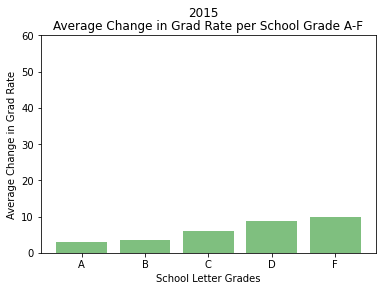

In [36]:
gradegrad15 = grade_grad15.groupby(['Corp Grade 2015'])
y_axis2015 = gradegrad15['Percent Change in Grad Rate'].mean()

# Bar plot showing average change in grad rate per school letter grade  
grades = ['A', 'B', 'C', 'D', 'F']
x_axis = np.arange(0, len(grades))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Average Change in Grad Rate per School Grade A-F")
plt.suptitle("2015")
plt.xlabel("School Letter Grades")
plt.ylabel("Average Change in Grad Rate")

plt.bar(x_axis, y_axis2015, color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, grades)

# Set the y limits of the current chart
plt.ylim(0, 60)

plt.savefig("Output_Data/AveragChange15.png") 

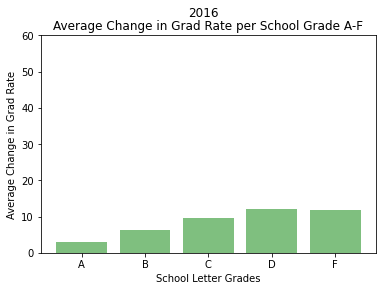

In [37]:
# Bar plot showing average change in grad rate per school letter grade  
gradegrad16 = grade_grad16.groupby(['Corp Grade 2016'])
y_axis2016 = gradegrad16['Percent Change in Grad Rate'].mean()

plt.title("Average Change in Grad Rate per School Grade A-F")
plt.suptitle("2016")
plt.xlabel("School Letter Grades")
plt.ylabel("Average Change in Grad Rate")

plt.bar(x_axis, y_axis2016, color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, grades)

# Set the y limits of the current chart
plt.ylim(0, 60)

plt.savefig("Output_Data/AveragChange16.png") 

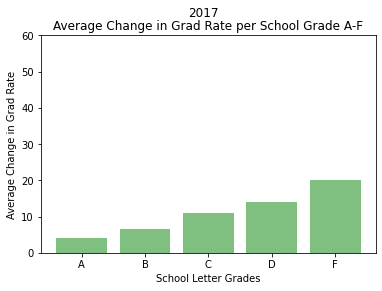

In [38]:
# Bar plot showing average change in grad rate per school letter grade  
gradegrad17 = grade_grad17.groupby(['Corp Grade 2017']) 
y_axis2017 = gradegrad17['Percent Change in Grad Rate'].mean()

plt.title("Average Change in Grad Rate per School Grade A-F")
plt.suptitle("2017")
plt.xlabel("School Letter Grades")
plt.ylabel("Average Change in Grad Rate")

plt.bar(x_axis, y_axis2017, color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, grades)

# Set the y limits of the current chart
plt.ylim(0, 60)

plt.savefig("Output_Data/AveragChange17.png") 

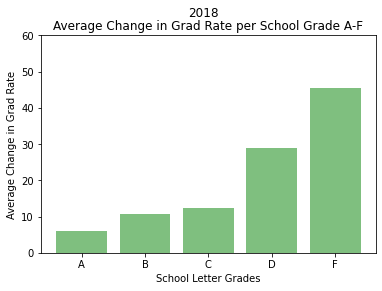

In [39]:
# Bar plot showing average change in grad rate per school letter grade  
gradegrad18 = grade_grad18.groupby(['Corp Grade 2018'])
y_axis2018 = gradegrad18['Percent Change in Grad Rate'].mean()

plt.title("Average Change in Grad Rate per School Grade A-F")
plt.suptitle("2018")
plt.xlabel("School Letter Grades")
plt.ylabel("Average Change in Grad Rate")

plt.bar(x_axis, y_axis2018, color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, grades)

# Set the y limits of the current chart
plt.ylim(0, 60)

plt.savefig("Output_Data/AveragChange18.png") 

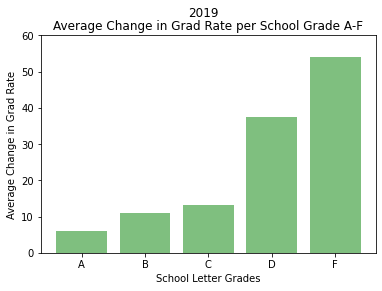

In [40]:
#Find average of change in grad rate per letter grade
gradegrad19 = grade_grad19.groupby(['Corp Grade 2019'])
y_axis2019 = gradegrad19['Percent Change in Grad Rate'].mean()

plt.title("Average Change in Grad Rate per School Grade A-F")
plt.suptitle("2019")
plt.xlabel("School Letter Grades")
plt.ylabel("Average Change in Grad Rate")

plt.bar(x_axis, y_axis2019, color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, grades)

# Set the y limits of the current chart
plt.ylim(0, 60)

plt.savefig("Output_Data/AveragChange19.png") 

In [41]:
df19 = grade_grad19.loc[grade_grad19['Corp Grade 2019'] == 'F']
df19.head()

,Corp ID,CORPORATION NAME,Corp Grade 2019,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
117,3640.0,Medora Community School Corporation,F,3640,20,16,80.00%,6,30.00%,62.500000
232,6795.0,Union School Corporation,F,6795,33,22,66.67%,12,36.36%,45.454545


In [42]:
#group19_df = pd.DataFrame(data=y_axis2019)
#group19df = group19_df.rename(columns={"Corp Grade 2019": "School Grade", 
#                            "Percent Change in Grad Rate": "Percent Change 2019"})

# group18_df = pd.DataFrame(data=y_axis2018)
# group18df = group18_df.rename(columns={"Corp Grade 2018": "School Grade", 
#                            "Percent Change in Grad Rate": "Percent Change 2018"})

# group17_df = pd.DataFrame(data=y_axis2017)
# group17df = group17_df.rename(columns={"Corp Grade 2017": "School Grade", 
#                            "Percent Change in Grad Rate": "Percent Change 2017"})

# y_axis2016
# group16df = group16_df.rename(columns={"Corp Grade 2016": "School Grade", 
#                            "Percent Change in Grad Rate": "Percent Change 2016"})




In [48]:
#y_axis2016

In [49]:
#y_axis2015

In [ ]:
# Another attempt at a group bar chart
# years defined above
# A = []
# B = []
# C = []
# D = []
# F = []


# x = np.arange(len(years))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, A, width, label='A')
# rects2 = ax.bar(x - width/2, B, width, label='B')
# rects3 = ax.bar(x + width/2, C, width, label='C')
# rects4 = ax.bar(x + width/2, D, width, label='D')
# rects5 = ax.bar(x + width/2, F, width, label='F')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Average Change in Graduation Rate')
# ax.set_title('Average Change in Graduation Rate per School Grade')
# ax.set_xticks(x)
# ax.set_xticklabels(years)
# ax.legend()


# def autolabel(rects):
#    ### Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)
# autolabel(rects5)

# fig.tight_layout()

# plt.show()


## Does the change in grad rate correlate with letter grade?

In [50]:
grade_grad15.head()

,Corp ID,CORPORATION NAME,Corp Grade 2015,Corp Id,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate,Percent Change in Grad Rate
0,15,Adams Central Community Schools,C,15,95,90,94.70%,87,91.60%,3.333333
1,5265,Alexandria Community School Corporation,C,5265,112,98,87.50%,97,86.60%,1.020408
2,5275,Anderson Community School Corporation,D,5275,394,353,89.60%,277,70.30%,21.529745
3,5470,Argos Community Schools,B,5470,46,34,73.90%,34,73.90%,0.000000
4,2435,Attica Consolidated School Corporation,D,2435,68,67,98.50%,64,94.10%,4.477612


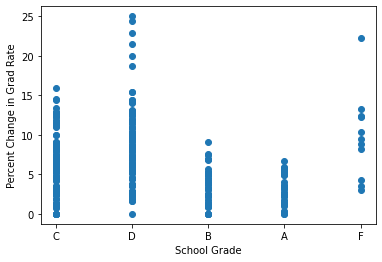

In [51]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(grade_grad15.iloc[:,2],grade_grad15.iloc[:,9])
plt.xlabel('School Grade')
plt.ylabel('Percent Change in Grad Rate')
plt.show()

In [52]:
# Extract individual groups
group_a = mapped2015.loc[mapped2015['Corp Grade 2015'] == 1]["Percent Change in Grad Rate"]
group_b = mapped2015.loc[mapped2015['Corp Grade 2015'] == 2]["Percent Change in Grad Rate"]
group_c = mapped2015.loc[mapped2015['Corp Grade 2015'] == 3]["Percent Change in Grad Rate"]
group_d = mapped2015.loc[mapped2015['Corp Grade 2015'] == 4]["Percent Change in Grad Rate"]
group_f = mapped2015.loc[mapped2015['Corp Grade 2015'] == 5]["Percent Change in Grad Rate"]

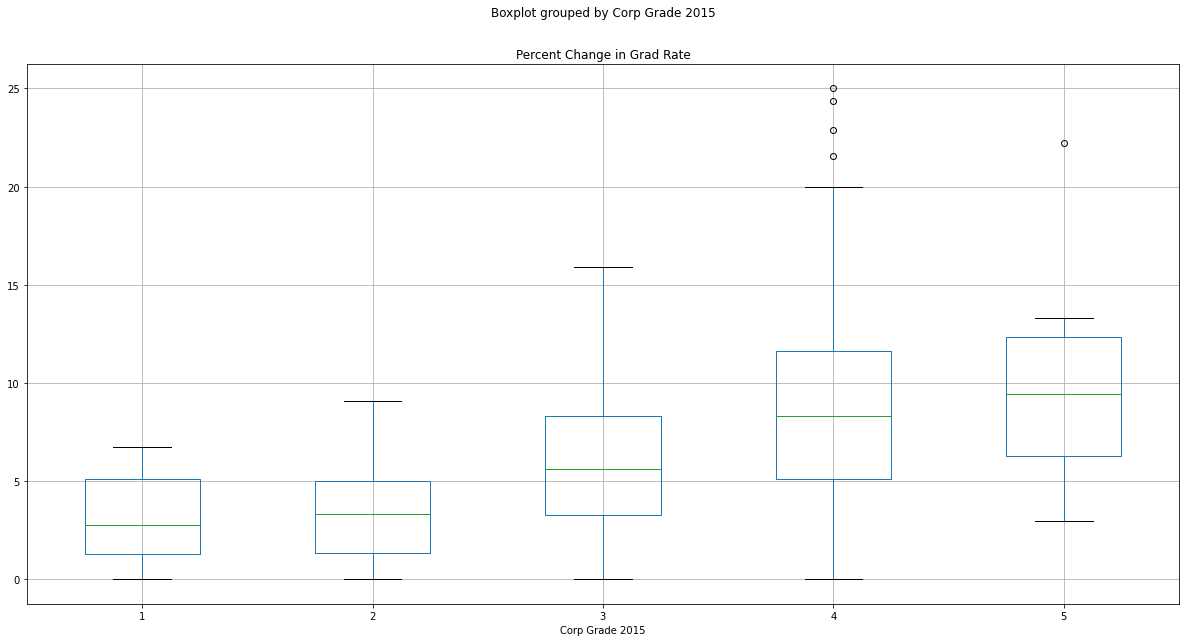

In [53]:
mapped2015.boxplot("Percent Change in Grad Rate", by="Corp Grade 2015", figsize=(20, 10))
plt.savefig("Output_Data/schoolgradeanova.png") 

In [54]:
stats.f_oneway(group_a, group_b, group_c, group_d, group_f)

F_onewayResult(statistic=19.80090518567931, pvalue=2.905239341452868e-14)